In [1]:
#--------Import packages
#--------For Netcdf manipulation
import xarray as xr
from netCDF4 import Dataset
import netCDF4 as nc

#--------For array manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Grouper

#--------For plotting
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap # plots maps
from matplotlib.cbook import dedent
#import cmocean
import seaborn as sns

# SAM x SIV

In [2]:
#-----Read in volume dataset as dataframe
vol_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/vol_mean_w.csv')
#-----Read in SAM as dataframe
sam_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/sam_long.csv',parse_dates=['Dates'])
#-----Read in dates  as dataframe
dates_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/dates_df.csv')

In [3]:
dates_df['Dates'] = dates_df['Dates'].astype('datetime64[ns]')

In [4]:
sam_df = sam_df.drop(["Years", "Months"], axis=1)

In [5]:
# Get dates  for only May -October
sam_df = sam_df[(sam_df.Dates.dt.month >= 5) & (sam_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
sam_df = sam_df.set_index('Dates')
sam_df = sam_df.loc['2002-05-01':'2018-10-01']
## Removing the first 5 rows/dates
sam_df  = sam_df.iloc[5:]

In [6]:
# we now want the 'Dates' as a normal column and not an index
sam_df = sam_df.reset_index()
# Combining the SAM and SIV Dates
df_new = sam_df.copy()
df_new["Volume"] = vol_df["volume"]

# calculate cross correlation


In [7]:
import numpy as np
import statsmodels.api as sm
## SAM and SIV ##
sm.tsa.stattools.ccf(df_new.SAM, df_new.Volume, adjusted=False)

array([-0.16331289, -0.11447988, -0.13803649, -0.22094582, -0.28469394,
       -0.26311213, -0.18488009, -0.10864683, -0.07107125, -0.11578835,
       -0.11624758, -0.08794586, -0.11432759, -0.07335499, -0.0451373 ,
       -0.100162  , -0.15097248, -0.10747097, -0.05905255, -0.00914743,
        0.0525702 , -0.02284172, -0.04001792,  0.01012377, -0.02016731,
        0.01427766,  0.09657089,  0.06716287,  0.0576259 ,  0.00312906,
        0.01090654,  0.03943565,  0.17328933,  0.0810811 ,  0.00773687,
       -0.05303646, -0.02168694,  0.09400179,  0.19089841,  0.10334032,
        0.01554198, -0.01375347,  0.03117119,  0.08697891,  0.16664919,
        0.10963432,  0.02228661,  0.04584135,  0.05060281,  0.13073653,
        0.21244682,  0.17235681,  0.08102116,  0.02579293,  0.0263436 ,
        0.08944974,  0.10519102,  0.08696084, -0.00175535, -0.00498236,
        0.00386138,  0.05915096,  0.09913284,  0.02573654, -0.01704216,
       -0.04714959, -0.04366646,  0.03803503,  0.05891874,  0.05

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   97 non-null     datetime64[ns]
 1   SAM     97 non-null     float64       
 2   Volume  97 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.4 KB


In [9]:
# make a dataframe just for volume
df_vol = df_new[['Dates','Volume']]
df_vol['Dates'] = dates_df['Dates'].dt.to_period('M')
df_vol = df_vol.set_index(['Dates'])

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_52097/3839699847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol['Dates'] = dates_df['Dates'].dt.to_period('M')


In [10]:
# make a dataframe just for SAM
df_sam = df_new[['Dates','SAM']]
df_sam['Dates'] = dates_df['Dates'].dt.to_period('M')
df_sam = df_sam.set_index(['Dates'])

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_52097/2807624462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam['Dates'] = dates_df['Dates'].dt.to_period('M')


/Users/fridaperez/miniconda3/envs/basemap_stable/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


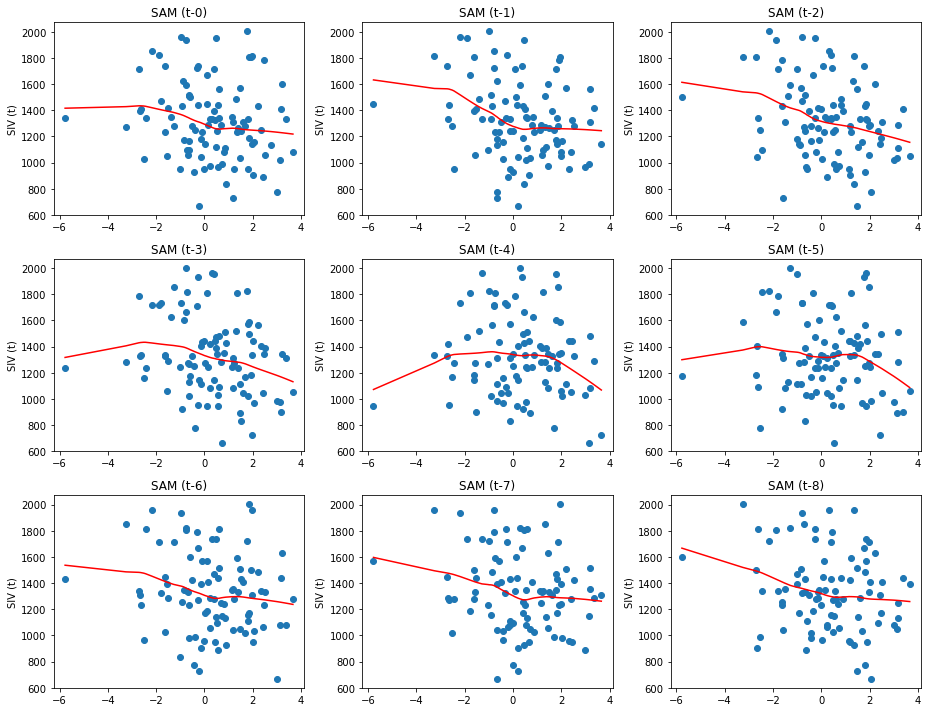

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

lag = 0
for row in range(3):
    for col in range(3):
        lowess = sm.nonparametric.lowess(df_vol.iloc[:, 0], df_sam.iloc[:, 0].shift(lag))
        axes[row, col].scatter(df_sam.shift(lag), df_vol)
        axes[row, col].set_title(f"SAM (t-{lag})")
        axes[row, col].set_ylabel("SIV (t)")
        axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
        lag += 1

fig.tight_layout()
plt.savefig("/Users/fridaperez/Developer/repos/local_repo/pub_plots/Weddell_ccf_SAM.png", dpi=300)

# SOI x SIV

In [12]:
#-----Read in SOI as dataframe
soi_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/SOI_index.csv')

In [13]:
# have to use pandas melt to go from wide to long data
soi_melt = pd.melt(soi_df, id_vars='Years')
soi_melt = soi_melt.rename(columns={"variable":"Month"})
soi_melt['Dates'] = pd.to_datetime(soi_melt[['Years', 'Month']].assign(DAY=1))

In [14]:
soi_melt = soi_melt.drop(["Years", "Month"], axis=1)
soi_melt['Dates'] = soi_melt['Dates'].astype('datetime64[ns]')

In [15]:
soi_melt

,value,Dates
0,1.0,1866-01-01
1,1.2,1867-01-01
2,-0.2,1868-01-01
3,1.5,1869-01-01
4,-2.3,1870-01-01
...,...,...
1879,-1.1,2018-12-01
1880,1.1,2019-12-01
1881,-0.8,2020-12-01
1882,-0.8,2021-12-01


In [16]:
# Get dates  for only May -October
soi_melt = soi_melt[(soi_melt.Dates.dt.month >= 5) & (soi_melt.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
soi_melt = soi_melt.set_index('Dates')
soi_melt = soi_melt.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
soi_melt  = soi_melt.iloc[5:]

In [17]:
# # we now want the 'Dates' as a normal column and not an index
soi_melt = soi_melt.reset_index()
soi_melt.rename(columns = {'SOI':'value'}, inplace = True)

# # Combining the SOI and SIV Dates
df_new_soi = soi_melt.copy()
df_new_soi["Volume"] = vol_df["volume"]

In [18]:
df_new_soi.reset_index()

,index,Dates,value,Volume
0,0,2007-05-01,0.9,950.837862
1,1,2008-05-01,1.3,1093.023526
2,2,2009-05-01,-0.3,1178.850939
3,3,2010-05-01,-0.7,1241.755970
4,4,2011-05-01,1.1,1266.581174
...,...,...,...,...
92,92,2014-10-01,1.0,1482.574281
93,93,2015-10-01,3.2,1510.433459
94,94,2016-10-01,-0.2,1626.566458
95,95,2017-10-01,-1.2,1516.098355


In [19]:
df_new_soi.rename(columns = {'value':'SOI'}, inplace = True)

In [20]:
df_new_soi

,Dates,SOI,Volume
0,2007-05-01,0.9,950.837862
1,2008-05-01,1.3,1093.023526
2,2009-05-01,-0.3,1178.850939
3,2010-05-01,-0.7,1241.755970
4,2011-05-01,1.1,1266.581174
...,...,...,...
92,2014-10-01,1.0,1482.574281
93,2015-10-01,3.2,1510.433459
94,2016-10-01,-0.2,1626.566458
95,2017-10-01,-1.2,1516.098355


# Calculate cross correlation


In [21]:
import numpy as np
import statsmodels.api as sm
## SOI and SIV ##
sm.tsa.stattools.ccf(df_new_soi.SOI, df_new_soi.Volume, adjusted=False)

array([-0.0935963 , -0.17510866, -0.21384266, -0.2241751 , -0.16180066,
       -0.10005154, -0.16336332, -0.18826561, -0.26337009, -0.21022173,
       -0.16324274, -0.09169893, -0.15968173, -0.16911479, -0.16679726,
       -0.16110059, -0.08888054, -0.00691666, -0.12137306, -0.14402432,
       -0.13029631, -0.16376003, -0.13249664, -0.0689882 , -0.08869674,
       -0.09393523, -0.07866072, -0.12242131, -0.07900894, -0.08796957,
       -0.13752715, -0.10204754, -0.11319872, -0.06681791,  0.03533878,
        0.02393218, -0.11417953, -0.08483833, -0.03968288, -0.02096009,
        0.04400867,  0.08474539,  0.02926076,  0.03002473, -0.01082855,
       -0.02691779,  0.04381616,  0.12302729,  0.08317522,  0.06197811,
        0.02348898,  0.00753452,  0.08089964,  0.11112612,  0.04579492,
        0.0745578 ,  0.04525438,  0.02525775,  0.10647921,  0.13390425,
        0.07635698,  0.06933781,  0.04794796,  0.01196807,  0.12117476,
        0.14885862,  0.08502587,  0.10177199,  0.07580402,  0.03

In [22]:
df_new_soi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   97 non-null     datetime64[ns]
 1   SOI     97 non-null     float64       
 2   Volume  97 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.4 KB


In [23]:
# make a dataframe just for SOI
df_soi = df_new_soi[['Dates','SOI']]
df_soi['Dates'] = dates_df['Dates'].dt.to_period('M')
df_soi = df_soi.set_index(['Dates'])

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_52097/3428752084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soi['Dates'] = dates_df['Dates'].dt.to_period('M')


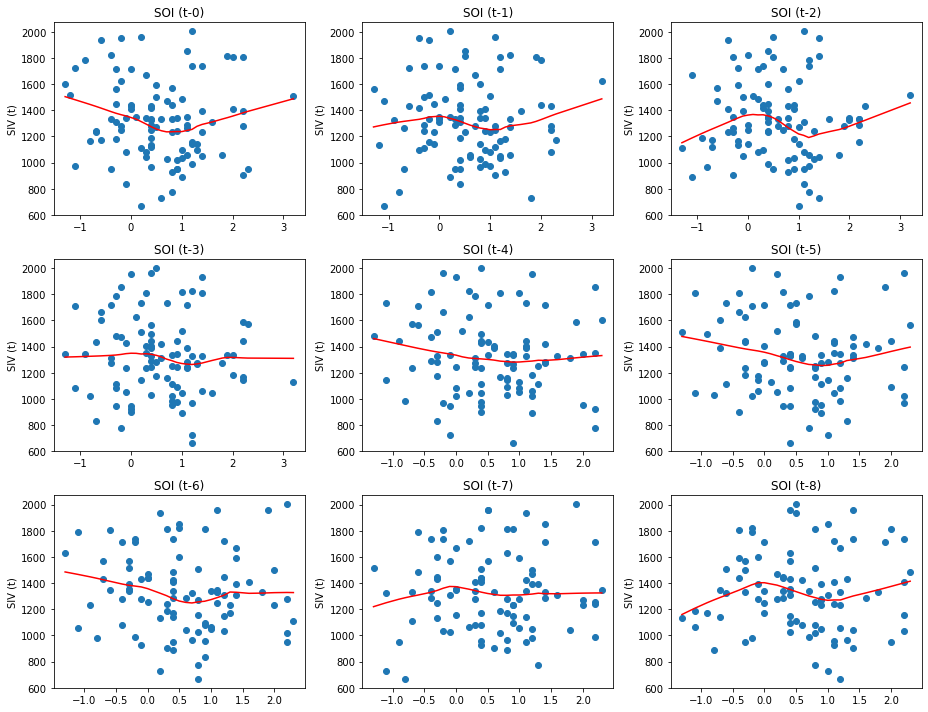

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

lag = 0
for row in range(3):
    for col in range(3):
        lowess = sm.nonparametric.lowess(df_vol.iloc[:, 0], df_soi.iloc[:, 0].shift(lag))
        axes[row, col].scatter(df_soi.shift(lag), df_vol)
        axes[row, col].set_title(f"SOI (t-{lag})")
        axes[row, col].set_ylabel("SIV (t)")
        axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
        lag += 1

fig.tight_layout()
plt.savefig("/Users/fridaperez/Developer/repos/local_repo/pub_plots/Weddell_ccf_SOI.png", dpi=300)

# ASL x SIV

In [25]:
#-----Read in ASL as dataframe
asl_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/ASL_index.csv')

In [26]:
asl_df

,Dates,Lon,Lat,ActCenPres,SectorPres,RelCenPres
0,2002-10-01,287.50,-65.75,986.911499,992.61320,-5.701721
1,2002-11-01,210.75,-71.50,988.258850,990.67206,-2.413208
2,2002-12-01,260.00,-67.00,976.395447,982.10020,-5.704773
3,2003-01-01,277.25,-63.00,986.213196,990.83466,-4.621460
4,2003-02-01,270.75,-66.50,976.448608,985.44165,-8.993042
...,...,...,...,...,...,...
227,2021-09-01,243.25,-70.50,962.242188,971.92790,-9.685730
228,2021-10-01,251.25,-69.50,959.429382,973.15680,-13.727417
229,2021-11-01,255.75,-70.00,966.653748,975.75385,-9.100098
230,2021-12-01,253.25,-71.25,968.441101,976.56810,-8.127014


In [27]:
asl_df = asl_df.drop(["Lon", "Lat","SectorPres", "RelCenPres"], axis=1)
asl_df['Dates'] = asl_df['Dates'].astype('datetime64[ns]')
print(asl_df)

         Dates  ActCenPres
0   2002-10-01  986.911499
1   2002-11-01  988.258850
2   2002-12-01  976.395447
3   2003-01-01  986.213196
4   2003-02-01  976.448608
..         ...         ...
227 2021-09-01  962.242188
228 2021-10-01  959.429382
229 2021-11-01  966.653748
230 2021-12-01  968.441101
231 2022-01-01  978.003418

[232 rows x 2 columns]


In [28]:
# Get dates  for only May -October
asl_df = asl_df[(asl_df.Dates.dt.month >= 5) & (asl_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
asl_df = asl_df.set_index('Dates')
asl_df = asl_df.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
#asl_df  = asl_df.iloc[5:]
print(asl_df)

            ActCenPres
Dates                 
2002-10-01  986.911499
2003-05-01  967.435608
2003-06-01  985.111511
2003-07-01  969.911377
2003-08-01  972.973511
...                ...
2018-06-01  972.353699
2018-07-01  977.746094
2018-08-01  978.081421
2018-09-01  970.656189
2018-10-01  965.293152

[97 rows x 1 columns]


In [29]:
# # we now want the 'Dates' as a normal column and not an index
asl_df = asl_df.reset_index()
print(asl_df)

        Dates  ActCenPres
0  2002-10-01  986.911499
1  2003-05-01  967.435608
2  2003-06-01  985.111511
3  2003-07-01  969.911377
4  2003-08-01  972.973511
..        ...         ...
92 2018-06-01  972.353699
93 2018-07-01  977.746094
94 2018-08-01  978.081421
95 2018-09-01  970.656189
96 2018-10-01  965.293152

[97 rows x 2 columns]


In [30]:
# # Combining the ASL and SIV Dates
df_new_asl = asl_df.copy()
df_new_asl["Volume"] = vol_df["volume"]
print(df_new_asl)

        Dates  ActCenPres       Volume
0  2002-10-01  986.911499   950.837862
1  2003-05-01  967.435608  1093.023526
2  2003-06-01  985.111511  1178.850939
3  2003-07-01  969.911377  1241.755970
4  2003-08-01  972.973511  1266.581174
..        ...         ...          ...
92 2018-06-01  972.353699  1482.574281
93 2018-07-01  977.746094  1510.433459
94 2018-08-01  978.081421  1626.566458
95 2018-09-01  970.656189  1516.098355
96 2018-10-01  965.293152  1132.882550

[97 rows x 3 columns]


## calculate cross correlation

In [31]:
import numpy as np
import statsmodels.api as sm
## ASL and SIV ##
sm.tsa.stattools.ccf(df_new_asl.ActCenPres, df_new_asl.Volume, adjusted=False)

array([ 9.75122132e-02, -6.93178516e-02, -1.85744253e-01, -1.52294821e-01,
        1.99936251e-04,  1.42235954e-01,  9.76118158e-02, -1.35249065e-01,
       -2.50166673e-01, -2.45341921e-01, -1.38376509e-01,  5.99312768e-03,
        4.72288953e-03, -9.83483165e-02, -1.53207560e-01, -9.35858772e-02,
       -3.53488346e-04,  1.01917924e-01,  7.56023554e-02, -8.10271584e-02,
       -1.74615778e-01, -1.47955852e-01, -2.39194470e-02,  1.16970043e-01,
        7.27819803e-02, -9.56611652e-02, -1.25674809e-01, -1.11072280e-01,
        3.99999490e-02,  1.15154317e-01,  8.03530558e-02, -1.13525180e-02,
       -6.41334301e-02, -7.30107058e-02, -1.39819307e-02,  1.10499849e-01,
        7.97358064e-02, -5.09329849e-02, -1.06550219e-01, -6.89039145e-02,
        1.10833891e-02,  1.02686022e-01,  1.12283401e-01,  3.59169035e-02,
       -2.51789211e-02, -2.78605245e-02,  2.15543001e-02,  6.99114845e-02,
        6.84612562e-02, -4.63591398e-03, -4.97299446e-02, -7.29255376e-02,
        8.26548152e-03,  

In [32]:
# make a dataframe just for ASL
df_asl = df_new_asl[['Dates','ActCenPres']]
df_asl['Dates'] = dates_df['Dates'].dt.to_period('M')
df_asl = df_asl.set_index(['Dates'])

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_52097/703316224.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asl['Dates'] = dates_df['Dates'].dt.to_period('M')


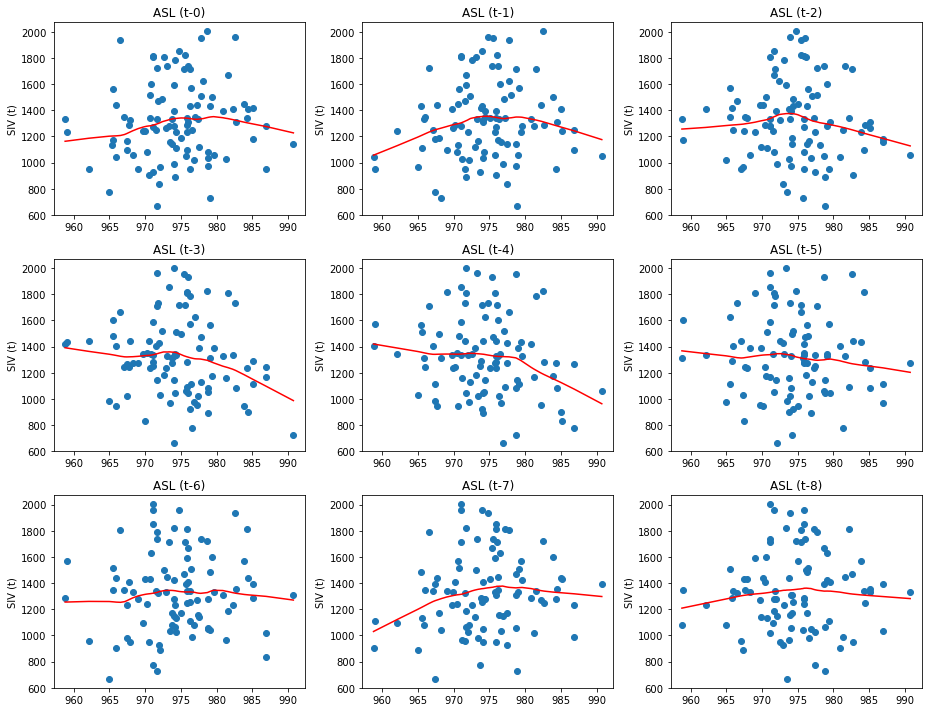

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 10))

lag = 0
for row in range(3):
    for col in range(3):
        lowess = sm.nonparametric.lowess(df_vol.iloc[:, 0], df_asl.iloc[:, 0].shift(lag))
        axes[row, col].scatter(df_asl.shift(lag), df_vol)
        axes[row, col].set_title(f"ASL (t-{lag})")
        axes[row, col].set_ylabel("SIV (t)")
        axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
        lag += 1

fig.tight_layout()
plt.savefig("/Users/fridaperez/Developer/repos/local_repo/pub_plots/Weddell_ccf_ASL.png", dpi=300)

In [34]:
df_new_asl

,Dates,ActCenPres,Volume
0,2002-10-01,986.911499,950.837862
1,2003-05-01,967.435608,1093.023526
2,2003-06-01,985.111511,1178.850939
3,2003-07-01,969.911377,1241.755970
4,2003-08-01,972.973511,1266.581174
...,...,...,...
92,2018-06-01,972.353699,1482.574281
93,2018-07-01,977.746094,1510.433459
94,2018-08-01,978.081421,1626.566458
95,2018-09-01,970.656189,1516.098355


In [35]:
df_asl

,ActCenPres
Dates,
2002-10,986.911499
2003-05,967.435608
2003-06,985.111511
2003-07,969.911377
2003-08,972.973511
...,...
2018-06,972.353699
2018-07,977.746094
2018-08,978.081421
